1. Import the necessary libraries if you are starting a new notebook.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


2. Load the csv. Use the variable customer_df as customer_df = pd.read_csv().

In [2]:
customer_df = pd.read_csv(r"C:\Users\angel\Desktop\Data Analysis\Ironhack\Labs\lab-cleaning-categorical-data\files_for_lab\we_fn_use_c_marketing_customer_value_analysis.csv")
customer_df

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,LA72316,California,23405.987980,No,Basic,Bachelor,2/10/11,Employed,M,71941,...,89,0,2,Personal Auto,Personal L1,Offer2,Web,198.234764,Four-Door Car,Medsize
9130,PK87824,California,3096.511217,Yes,Extended,College,2/12/11,Employed,F,21604,...,28,0,1,Corporate Auto,Corporate L3,Offer1,Branch,379.200000,Four-Door Car,Medsize
9131,TD14365,California,8163.890428,No,Extended,Bachelor,2/6/11,Unemployed,M,0,...,37,3,2,Corporate Auto,Corporate L2,Offer1,Branch,790.784983,Four-Door Car,Medsize
9132,UP19263,California,7524.442436,No,Extended,College,2/3/11,Employed,M,21941,...,3,0,3,Personal Auto,Personal L2,Offer3,Branch,691.200000,Four-Door Car,Large


3. What should we do with the customer_id column?

In [3]:
customer_df.columns = customer_df.columns.str.lower().str.replace(" ", "_")
customer_df.columns = customer_df.columns.str.replace("customer","customer_id")

In [4]:
customer_df["customer_id"].isna().sum()

0

4. Load the continuous and discrete variables into numericals_df and categorical_df variables, for eg.: numerical_df = customer_df.select_dtypes() categorical_df = customer_df.select_dtypes()

In [5]:
numerical = customer_df.select_dtypes("number")
categorical = customer_df.select_dtypes("object")

5. Plot every categorical variable. What can you see in the plots? Note that in the previous lab you used a bar plot to plot categorical data, with each unique category in the column on the x-axis and an appropriate measure on the y-axis. However, this time you will try a different plot. This time in each plot for the categorical variable you will have, each unique category in the column on the x-axis and the target (which is numerical) on the Y-axis

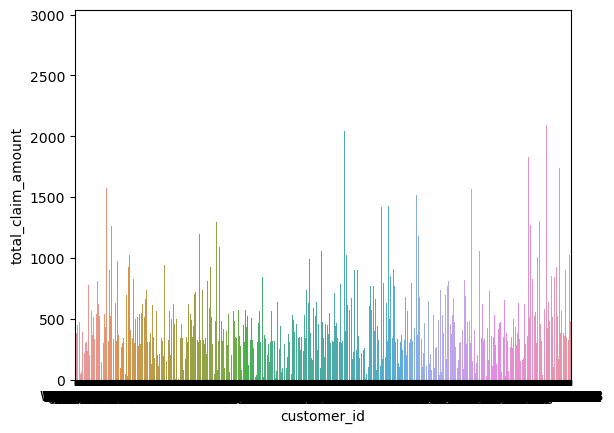

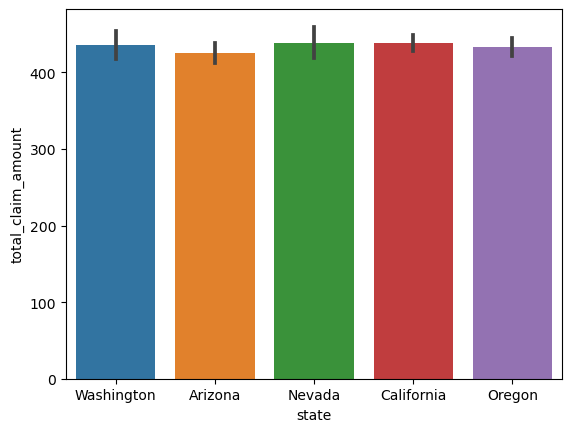

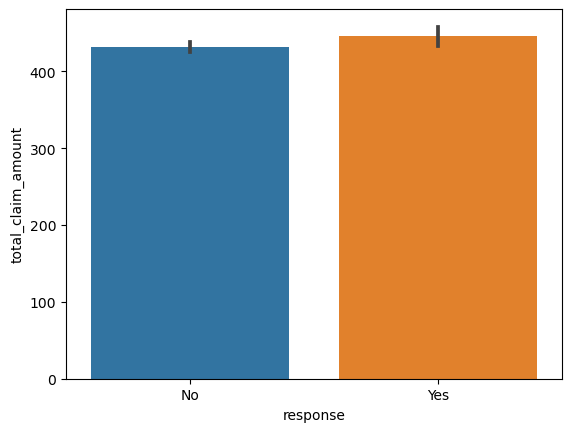

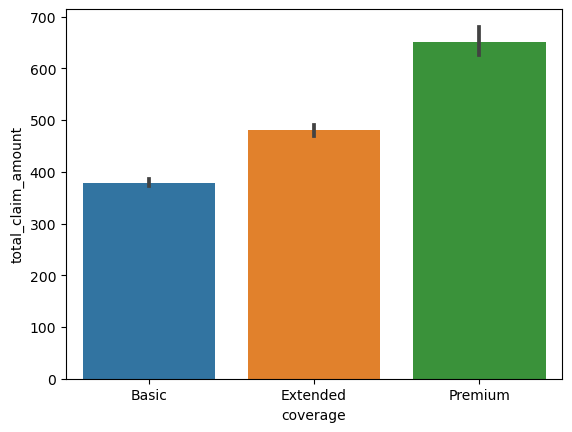

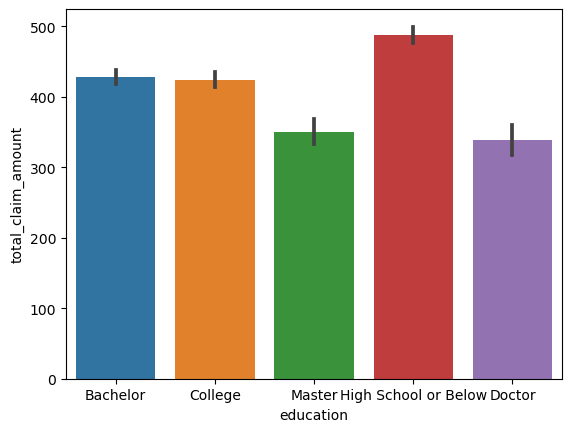

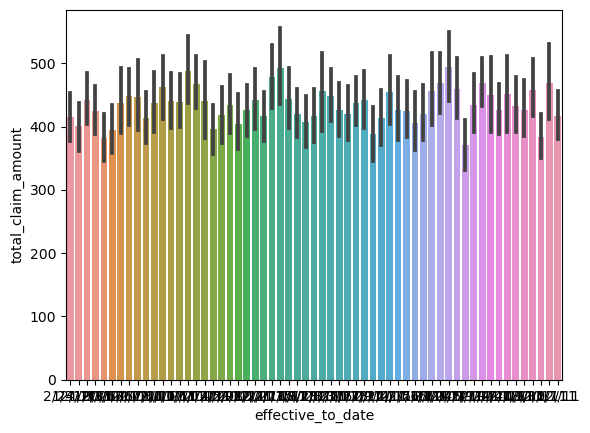

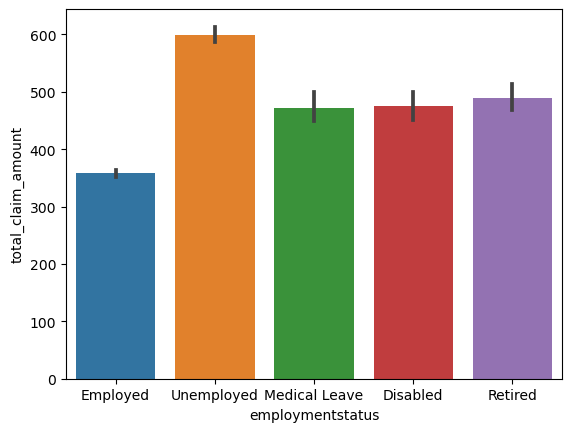

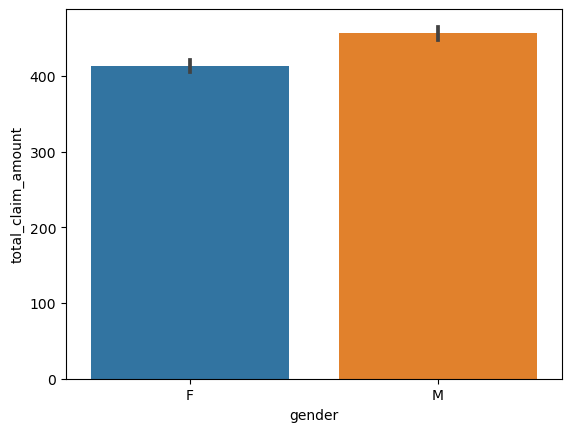

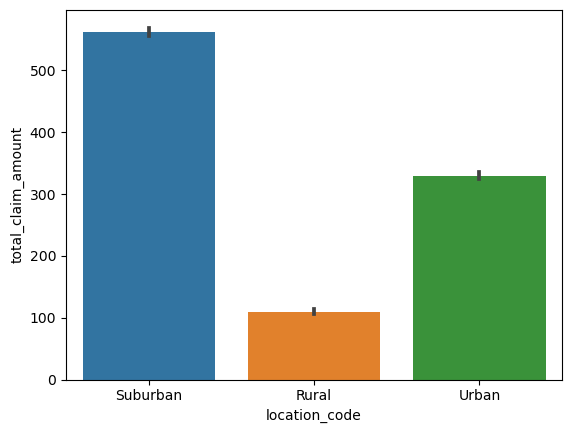

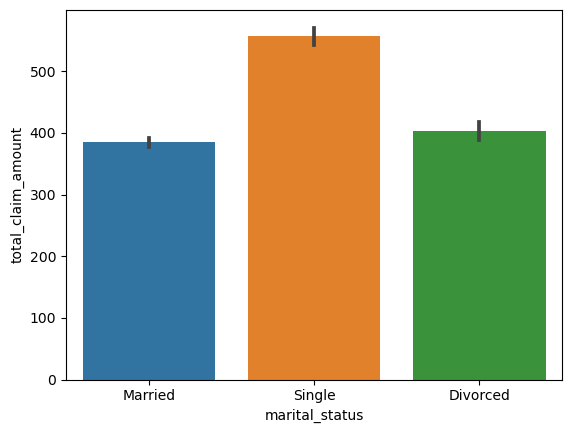

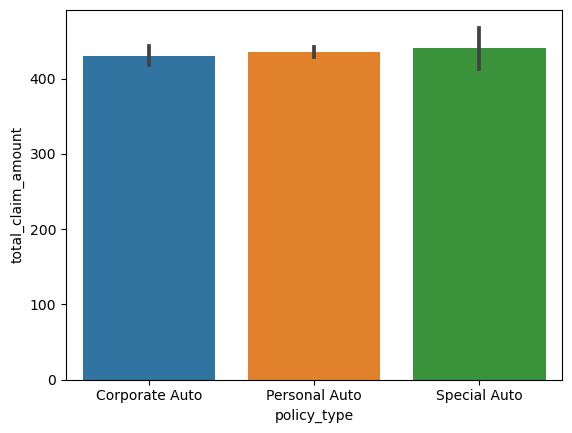

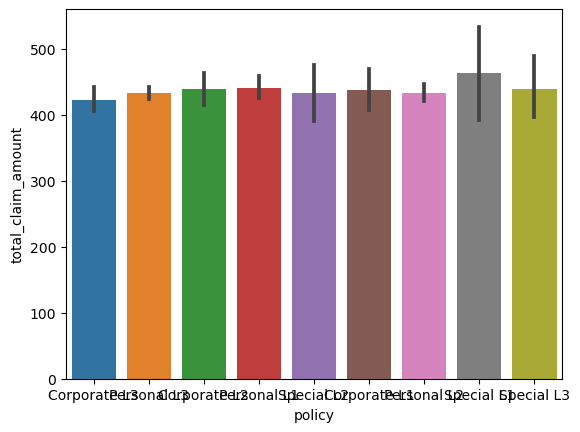

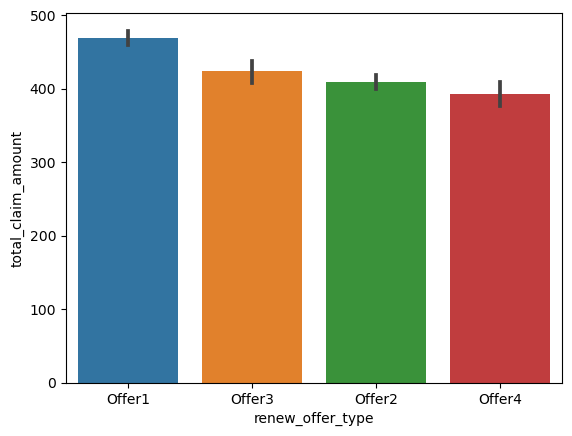

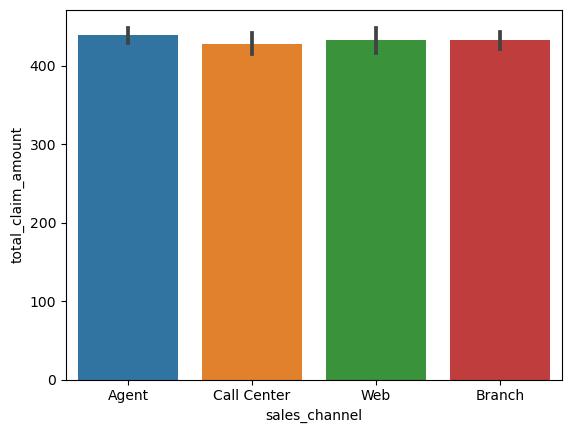

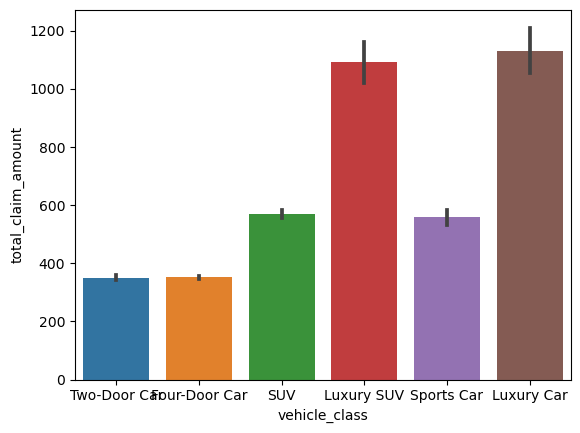

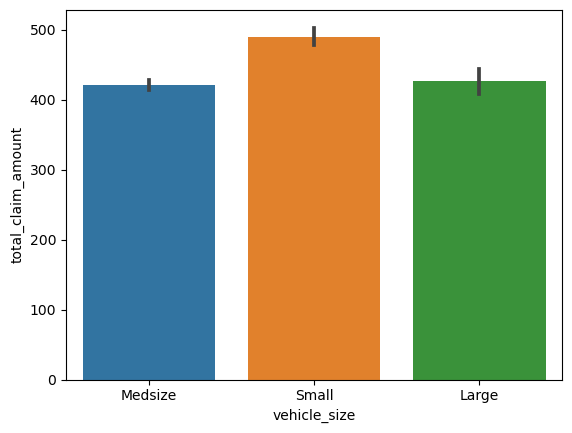

In [6]:
for c in categorical.columns:
  sns.barplot(x=categorical[c], y=customer_df["total_claim_amount"])
  plt.show()

6. For the categorical data, check if there is any data cleaning that need to perform. Hint: You can use the function value_counts() on each of the categorical columns and check the representation of different categories in each column. Discuss if this information might in some way be used for data cleaning.

In [7]:
for c in categorical.columns:
    print(c.upper())
    print(categorical[c].value_counts())
    print("""
          
                """)

CUSTOMER_ID
customer_id
BU79786    1
PU81096    1
CO75086    1
WW52683    1
XO38850    1
          ..
HS14476    1
YL91587    1
CT18212    1
EW35231    1
Y167826    1
Name: count, Length: 9134, dtype: int64

          
                
STATE
state
California    3150
Oregon        2601
Arizona       1703
Nevada         882
Washington     798
Name: count, dtype: int64

          
                
RESPONSE
response
No     7826
Yes    1308
Name: count, dtype: int64

          
                
COVERAGE
coverage
Basic       5568
Extended    2742
Premium      824
Name: count, dtype: int64

          
                
EDUCATION
education
Bachelor                2748
College                 2681
High School or Below    2622
Master                   741
Doctor                   342
Name: count, dtype: int64

          
                
EFFECTIVE_TO_DATE
effective_to_date
1/10/11    195
1/27/11    194
2/14/11    186
1/26/11    181
1/17/11    180
1/19/11    179
1/31/11    178
1/3/11     178
1/20/

## Feature Extraction

1. Open the categoricals variable we created before.

In [8]:
categorical = categorical.drop(columns=["effective_to_date", "customer_id"])

In [9]:
categorical.head()

,state,response,coverage,education,employmentstatus,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,Washington,No,Basic,Bachelor,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
1,Arizona,No,Extended,Bachelor,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
2,Nevada,No,Premium,Bachelor,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
3,California,No,Basic,Bachelor,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
4,Washington,No,Basic,Bachelor,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize


2. Plot all the categorical variables with the proper plot. What can you see?

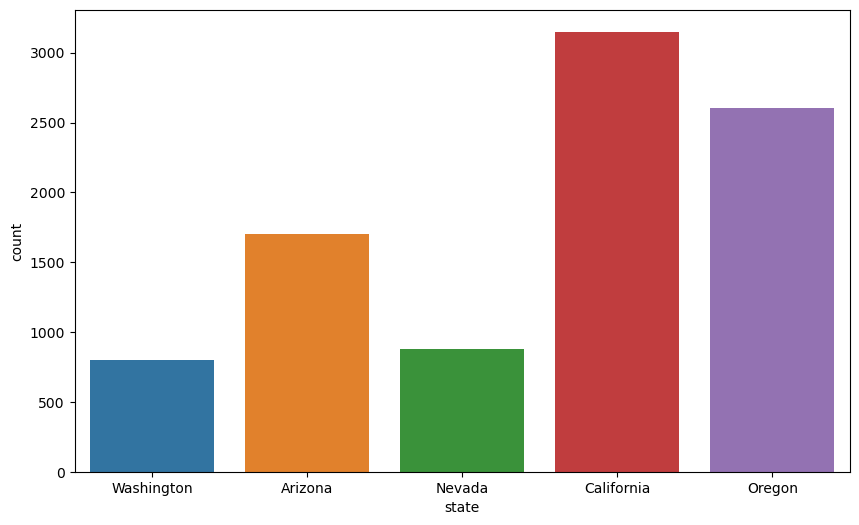

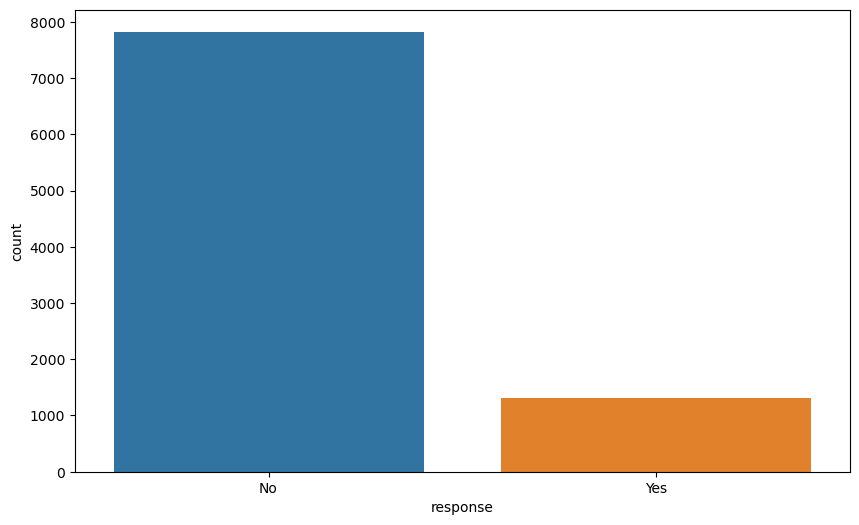

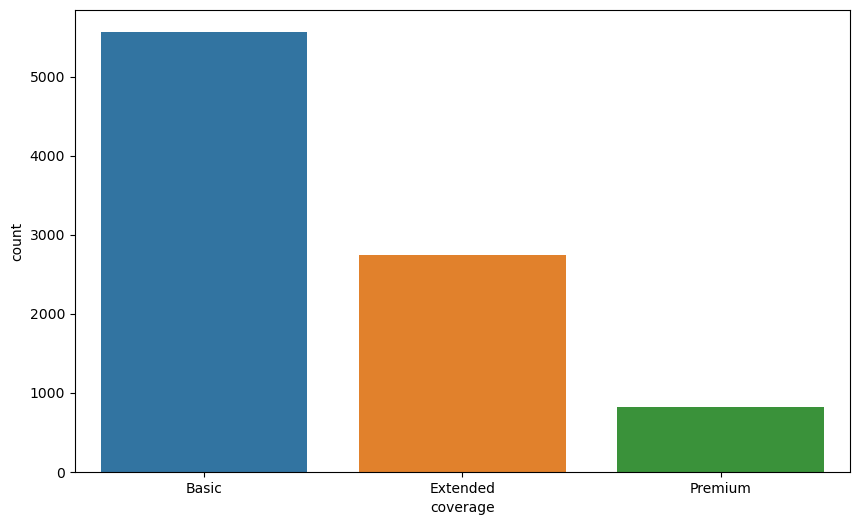

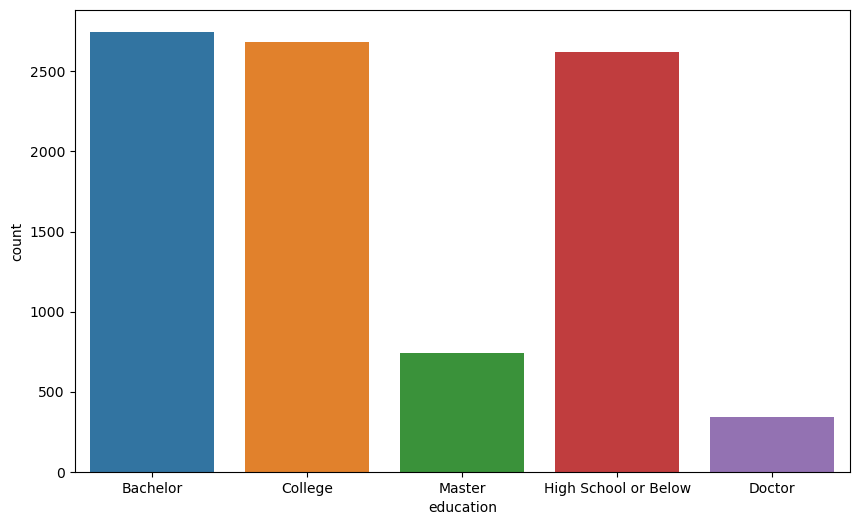

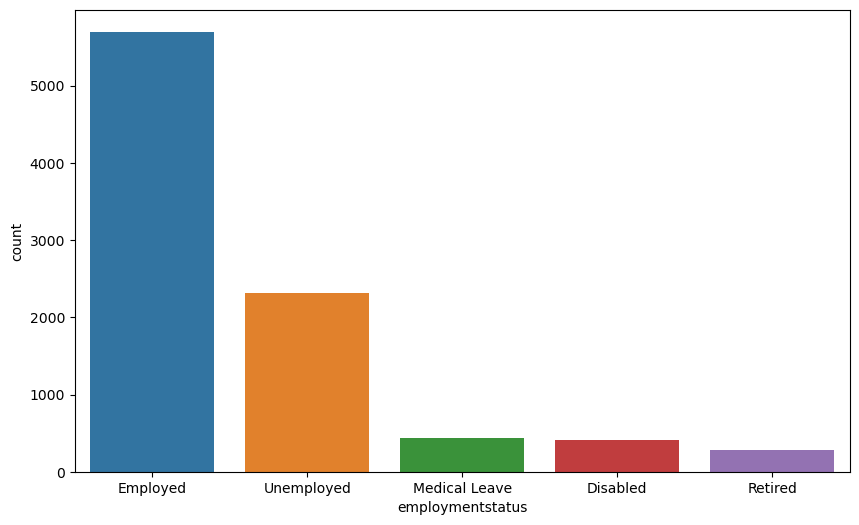

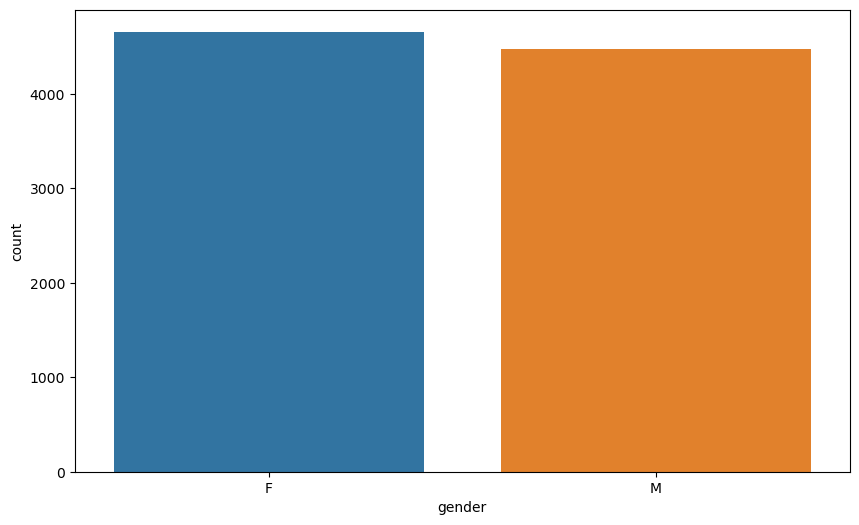

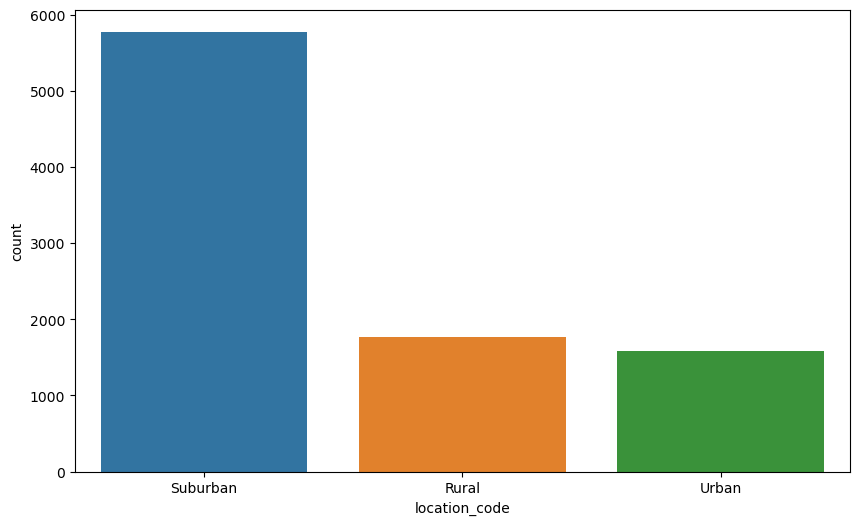

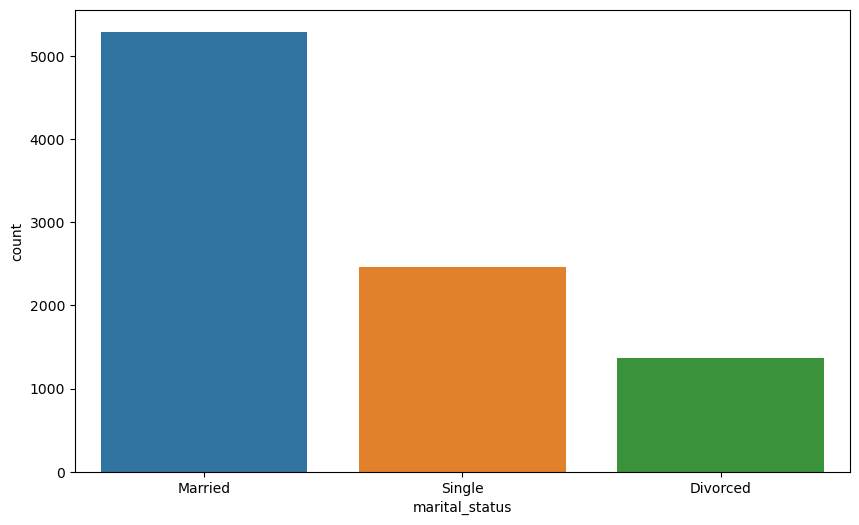

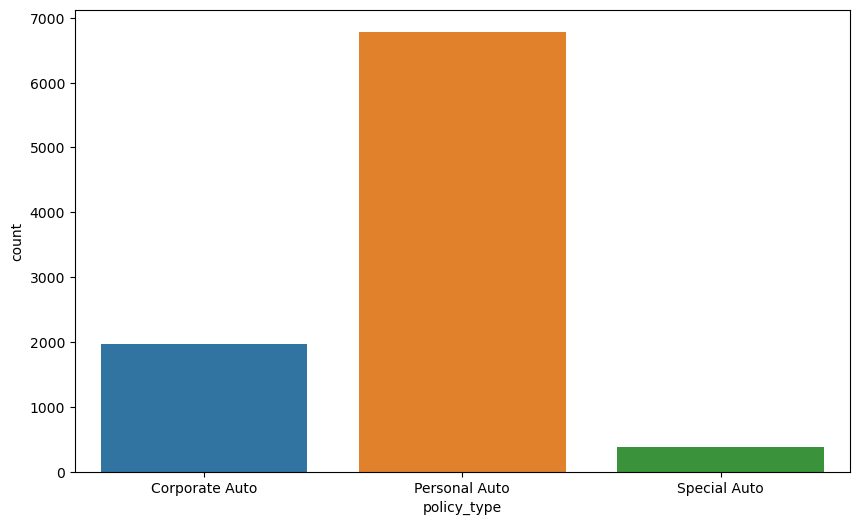

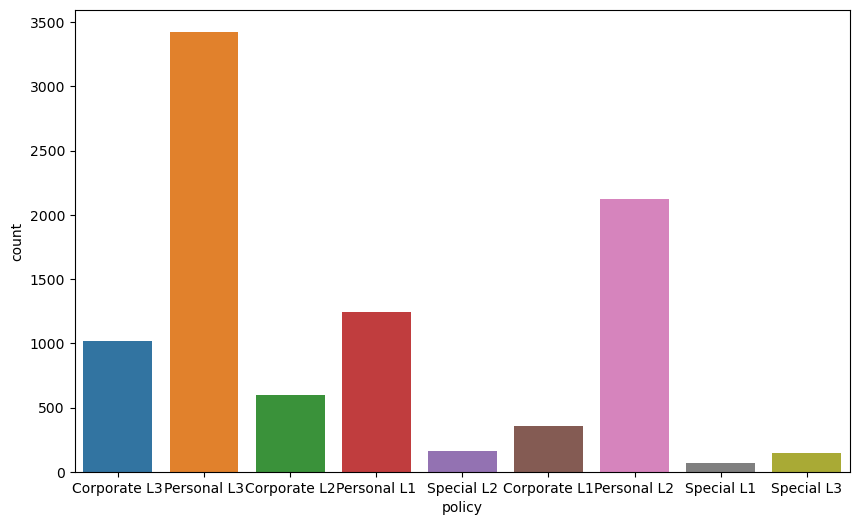

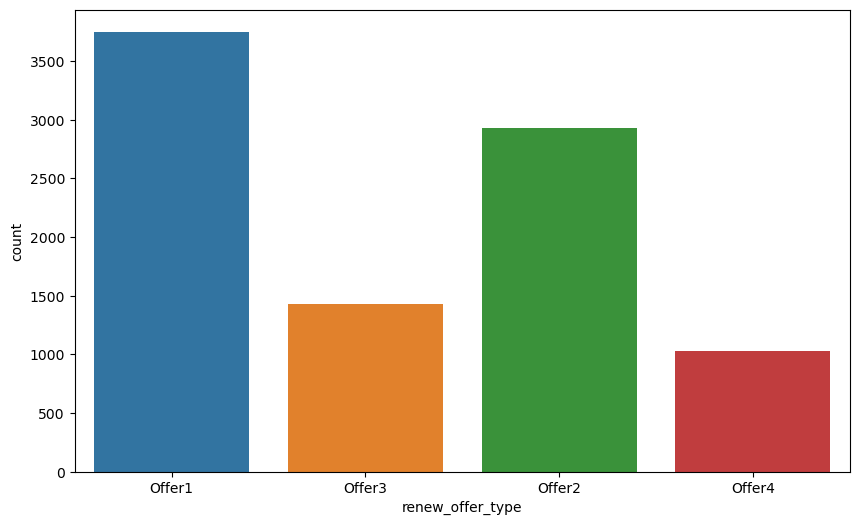

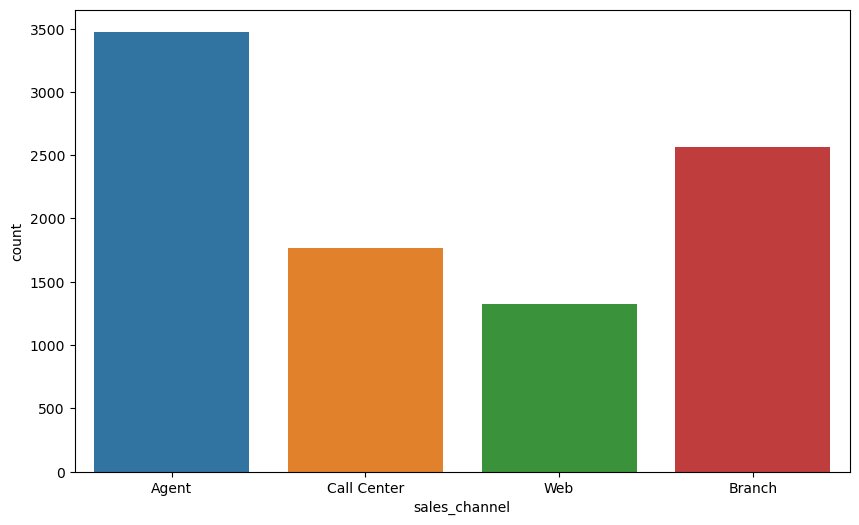

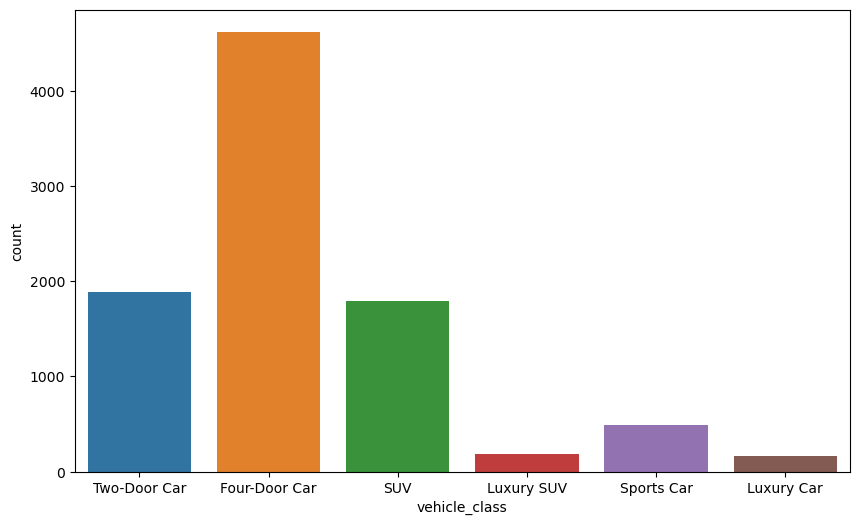

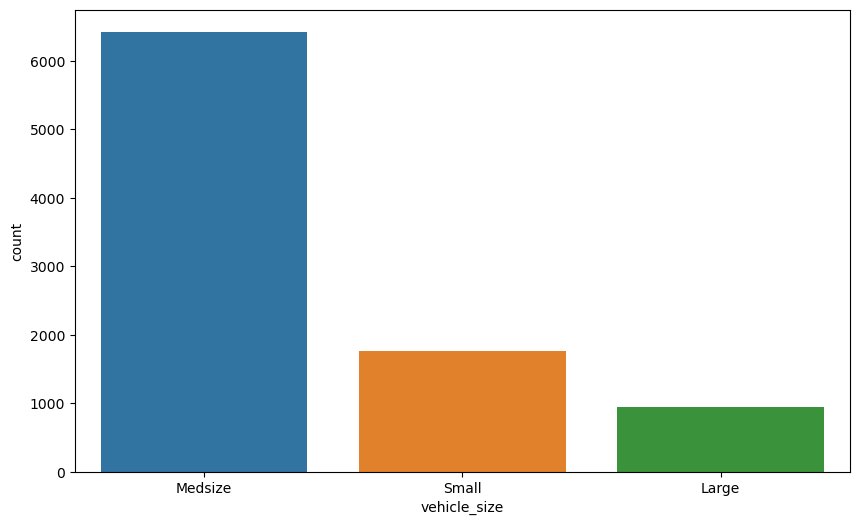

In [10]:
for col in categorical.columns:
    plt.figure(figsize=(10, 6))
    sns.countplot(x=col, data=categorical)
    plt.show()

3. There might be some columns that seem to be redundant, check their values to be sure. What should we do with them?

In [11]:
categorical = categorical.drop(columns="policy_type")
categorical.head()

,state,response,coverage,education,employmentstatus,gender,location_code,marital_status,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,Washington,No,Basic,Bachelor,Employed,F,Suburban,Married,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
1,Arizona,No,Extended,Bachelor,Unemployed,F,Suburban,Single,Personal L3,Offer3,Agent,Four-Door Car,Medsize
2,Nevada,No,Premium,Bachelor,Employed,F,Suburban,Married,Personal L3,Offer1,Agent,Two-Door Car,Medsize
3,California,No,Basic,Bachelor,Unemployed,M,Suburban,Married,Corporate L2,Offer1,Call Center,SUV,Medsize
4,Washington,No,Basic,Bachelor,Employed,M,Rural,Single,Personal L1,Offer1,Agent,Four-Door Car,Medsize


4. Plot time variable. Can you extract something from it?

C:\Users\angel\AppData\Local\Temp\ipykernel_20968\2559617129.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  customer_df['effective_to_date'] = pd.to_datetime(customer_df['effective_to_date'])


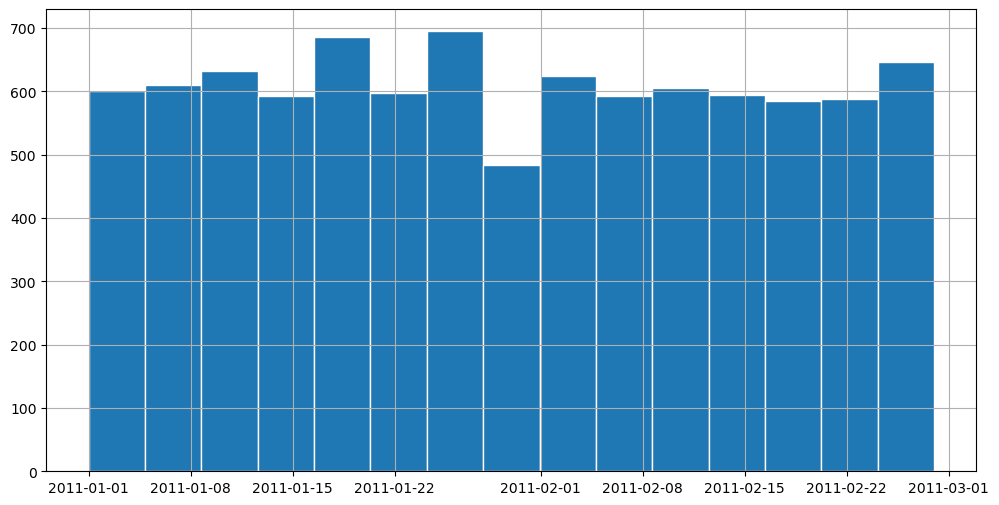

In [12]:
customer_df['effective_to_date'] = pd.to_datetime(customer_df['effective_to_date'])

plt.figure(figsize=(12, 6))
customer_df['effective_to_date'].hist(bins=15, edgecolor="white")
plt.show()

## Data Cleaning and Wrangling

1. We will start with removing outliers. So far, we have discussed different methods to remove outliers. Use the one you feel more comfortable with, define a function for that. Use the function to remove the outliers and apply it to the dataframe.

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

<Axes: >

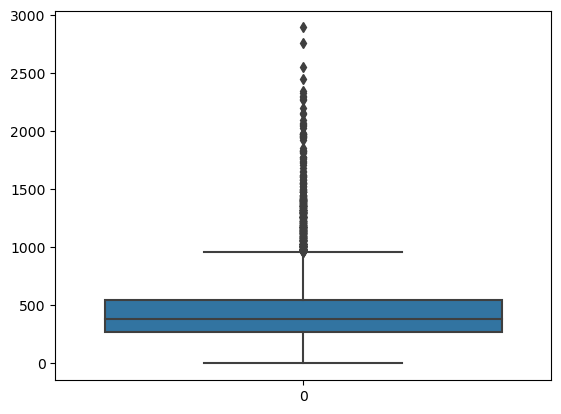

In [14]:
sns.boxplot(customer_df["total_claim_amount"])

In [15]:
customer_df = customer_df[( customer_df["total_claim_amount"] >= 0) & ( customer_df["total_claim_amount"] <= 1000)]

2. Create a copy of the dataframe for the data wrangling.

In [16]:
data = customer_df.copy()

3. Normalize the continuous variables. You can use any one method you want.

In [17]:
numerical.head()

,customer_id_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
0,2763.519279,56274,69,32,5,0,1,384.811147
1,6979.535903,0,94,13,42,0,8,1131.464935
2,12887.431650,48767,108,18,38,0,2,566.472247
3,7645.861827,0,106,18,65,0,7,529.881344
4,2813.692575,43836,73,12,44,0,1,138.130879


In [18]:
X = numerical.drop(columns='total_claim_amount')
y = numerical['total_claim_amount']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train_scaled, X_test_scaled, y_train, y_test = train_test_split(X_scaled, y, test_size=0.30, random_state=42)

4. Encode the categorical variables

In [19]:
categorical = pd.get_dummies(categorical, drop_first=True)

5. The time variable can be useful. Try to transform its data into a useful one. Hint: Day week and month as integers might be useful.

In [20]:
customer_df['effective_to_date'] = pd.to_datetime(customer_df['effective_to_date'])

customer_df['month'] = customer_df['effective_to_date'].dt.month
customer_df['year'] = customer_df['effective_to_date'].dt.year

customer_df.head()

C:\Users\angel\AppData\Local\Temp\ipykernel_20968\2763380195.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  customer_df['effective_to_date'] = pd.to_datetime(customer_df['effective_to_date'])
C:\Users\angel\AppData\Local\Temp\ipykernel_20968\2763380195.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  customer_df['month'] = customer_df['effective_to_date'].dt.month
C:\Users\angel\AppData\Local\Temp\ipykernel_20968\2763380195.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a sl

,customer_id,state,customer_id_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,...,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size,month,year
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2011-02-24,Employed,F,56274,...,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize,2,2011
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2011-02-19,Employed,F,48767,...,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize,2,2011
3,WW63253,California,7645.861827,No,Basic,Bachelor,2011-01-20,Unemployed,M,0,...,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize,1,2011
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2011-02-03,Employed,M,43836,...,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize,2,2011
5,OC83172,Oregon,8256.297800,Yes,Basic,Bachelor,2011-01-25,Employed,F,62902,...,2,Personal Auto,Personal L3,Offer2,Web,159.383042,Two-Door Car,Medsize,1,2011


6. Since the model will only accept numerical data, check and make sure that every column is numerical, if some are not, change it using encoding.

In [21]:
numerical.head()

,customer_id_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
0,2763.519279,56274,69,32,5,0,1,384.811147
1,6979.535903,0,94,13,42,0,8,1131.464935
2,12887.431650,48767,108,18,38,0,2,566.472247
3,7645.861827,0,106,18,65,0,7,529.881344
4,2813.692575,43836,73,12,44,0,1,138.130879


In [22]:
categorical.head()

,state_California,state_Nevada,state_Oregon,state_Washington,response_Yes,coverage_Extended,coverage_Premium,education_College,education_Doctor,education_High School or Below,...,sales_channel_Branch,sales_channel_Call Center,sales_channel_Web,vehicle_class_Luxury Car,vehicle_class_Luxury SUV,vehicle_class_SUV,vehicle_class_Sports Car,vehicle_class_Two-Door Car,vehicle_size_Medsize,vehicle_size_Small
0,False,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,True,False
1,False,False,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
2,False,True,False,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,True,True,False
3,True,False,False,False,False,False,False,False,False,False,...,False,True,False,False,False,True,False,False,True,False
4,False,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False


## Comparing regression models

In [26]:
numerical.shape

(9134, 8)

In [27]:
categorical.shape

(9134, 41)

In [31]:
final_df = pd.concat([numerical.reset_index(drop=True),categorical.reset_index(drop=True)], axis=1)

In [32]:
final_df.head()

,customer_id_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount,state_California,state_Nevada,...,sales_channel_Branch,sales_channel_Call Center,sales_channel_Web,vehicle_class_Luxury Car,vehicle_class_Luxury SUV,vehicle_class_SUV,vehicle_class_Sports Car,vehicle_class_Two-Door Car,vehicle_size_Medsize,vehicle_size_Small
0,2763.519279,56274,69,32,5,0,1,384.811147,False,False,...,False,False,False,False,False,False,False,True,True,False
1,6979.535903,0,94,13,42,0,8,1131.464935,False,False,...,False,False,False,False,False,False,False,False,True,False
2,12887.431650,48767,108,18,38,0,2,566.472247,False,True,...,False,False,False,False,False,False,False,True,True,False
3,7645.861827,0,106,18,65,0,7,529.881344,True,False,...,False,True,False,False,False,True,False,False,True,False
4,2813.692575,43836,73,12,44,0,1,138.130879,False,False,...,False,False,False,False,False,False,False,False,True,False


1. In this final lab, we will model our data. Import sklearn train_test_split and separate the data.

In [40]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor

X = final_df.drop(columns=['total_claim_amount'])
y = final_df['total_claim_amount']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

2. Try a simple linear regression with all the data to see whether we are getting good results.

In [35]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

lm = LinearRegression()
lm.fit(X_train_scaled, y_train)

pred = lm.predict(X_test_scaled)

mse = mean_squared_error(y_test, pred)
r2 = r2_score(y_test, pred)
mae = mean_absolute_error(y_test, pred)

print(f'mean squared error: {mse}')
print(f'r2: {r2}')
print(f'mean absolute error: {mae}')

mean squared error: 19182.50869311366
r2: 0.7650190335512377
mean absolute error: 94.52272816801202


3. Great! Now define a function that takes a list of models and train (and tests) them so we can try a lot of them without repeating code.

In [38]:
def train_test_models(models, X_train, y_train, X_test, y_test):
    list = []

    for key, model in models:
        model.fit(X_train, y_train)
        pred = model.predict(X_test)
        mse = mean_squared_error(y_test, pred)
        r2 = r2_score(y_test, pred)
        mae = mean_absolute_error(y_test, pred)
        list.append({
            'Model': key,
            'Mean Squared Error': mse,
            'R-squared Score': r2,
            'Mean Absolute Error': mae})
    return list

In [39]:
models= [('Linear Regression', LinearRegression()),('KNeighbors Regressor', KNeighborsRegressor())]
results = train_test_models(models, X_train_scaled, y_train, X_test_scaled, y_test)
for result in results:
    print(result)

{'Model': 'Linear Regression', 'Mean Squared Error': 19182.50869311366, 'R-squared Score': 0.7650190335512377, 'Mean Absolute Error': 94.52272816801202}
{'Model': 'KNeighbors Regressor', 'Mean Squared Error': 31605.95423355517, 'R-squared Score': 0.6128349117338185, 'Mean Absolute Error': 121.09134689653412}


5. You can check also the MLPRegressor for this task!

In [41]:
models = [('Linear Regression', LinearRegression()),('KNeighbors Regressor', KNeighborsRegressor()), ('MLP Regressor', MLPRegressor(random_state=42))]
results = train_test_models(models, X_train_scaled, y_train, X_test_scaled, y_test)
for result in results:
    print(result)

{'Model': 'Linear Regression', 'Mean Squared Error': 19182.50869311366, 'R-squared Score': 0.7650190335512377, 'Mean Absolute Error': 94.52272816801202}
{'Model': 'KNeighbors Regressor', 'Mean Squared Error': 31605.95423355517, 'R-squared Score': 0.6128349117338185, 'Mean Absolute Error': 121.09134689653412}
{'Model': 'MLP Regressor', 'Mean Squared Error': 15223.18685175303, 'R-squared Score': 0.8135197425903327, 'Mean Absolute Error': 82.47809367700557}


c:\Users\angel\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


6. Check and discuss the results.


With a lower Mean Squared Error, higher R-squared Score, and a smaller Mean Absolute Error, the MLP Regressor demonstrates superior performance